In [1]:
import sys
from pathlib import Path

In [2]:
module_path = Path.cwd().parent
if module_path not in sys.path:
    sys.path.append(str(module_path))

In [3]:
import pickle

In [4]:
from src.tsp_problem import TSPProblem
from src.visualization import Visualizer
from src.algorithms.methods import Method


In [5]:
import pandas as pd

In [6]:
problem = TSPProblem()

Loaded 4 instances: TSPA, TSPB, TSPC, TSPD
Available methods: ['RANDOM', 'NEAREST', 'GREEDY_CYCLE', 'GREEDY_REGRET', 'GREEDY_REGRET_WEIGHTED']


In [7]:
# grades = problem.run(instances=["TSPA", "TSPB"])
grades = pickle.load(open("grades.pkl", "rb"))

In [8]:
# pickle.dump(grades, open("grades.pkl", "wb"))

In [13]:
for instance_name, instance_grades in grades.items():
    print(f"\n{instance_name}:")
    print("----")
    for method_name, grade in instance_grades.items():
        meth_name = method_name.value.replace("_", " ").title()
        print(f"{meth_name}: {grade}")


TSPA:
----
Random: 
==================================== Grade =====================================
Method:                                 random
Best run id:                            181
Best run cost:                          101292
Best run distance:                      144004
Best run score:                         245296
Min score:                              245296
Avg score:                              264896
Max score:                              294815

Nearest: 
==================================== Grade =====================================
Method:                                 nearest
Best run id:                            1
Best run cost:                          51792
Best run distance:                      32679
Best run score:                         84471
Min score:                              84471
Avg score:                              87679
Max score:                              95013

Greedy Cycle: 
==================================== Grade ========

In [10]:
visualizer = Visualizer()

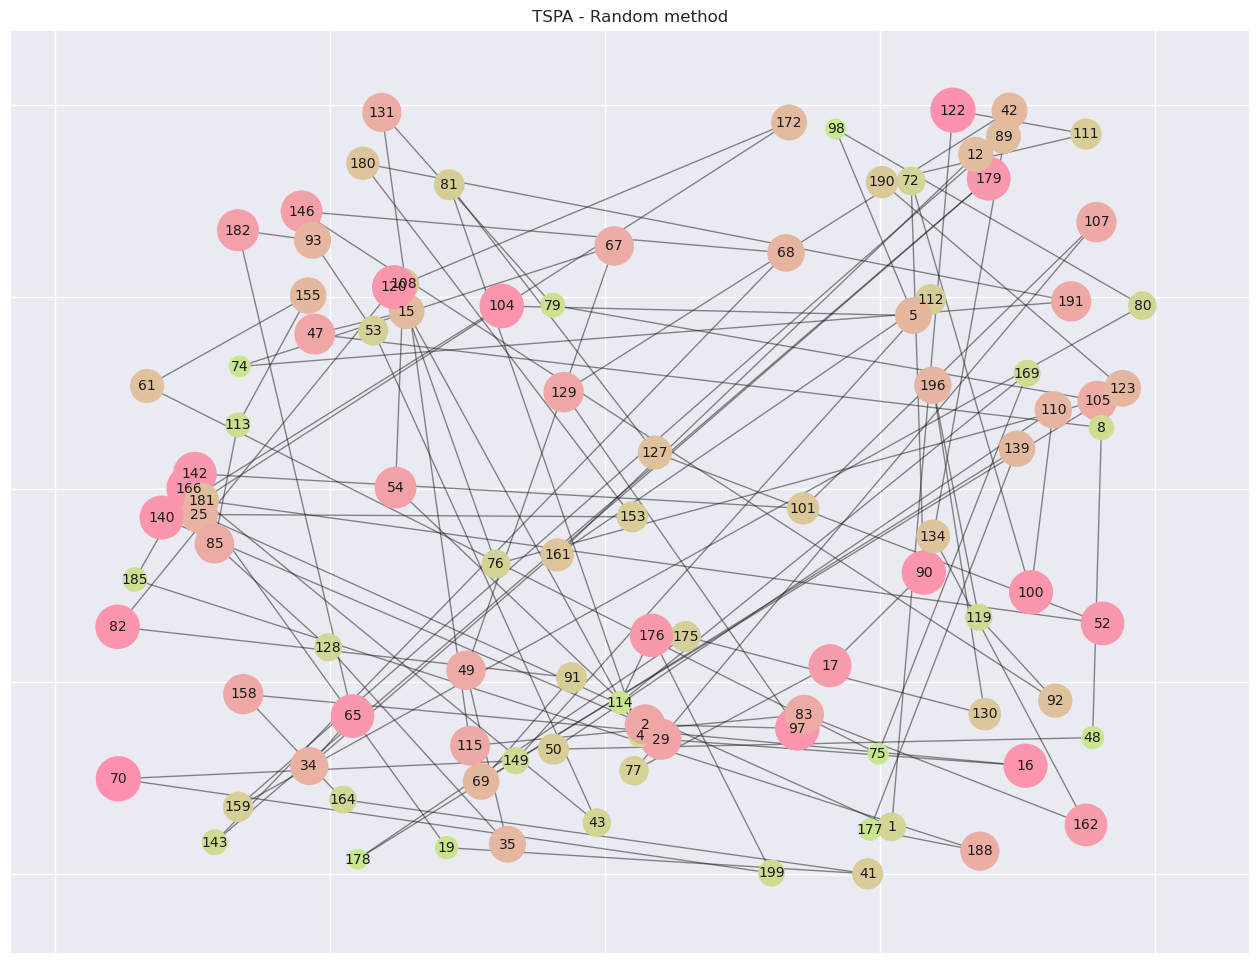

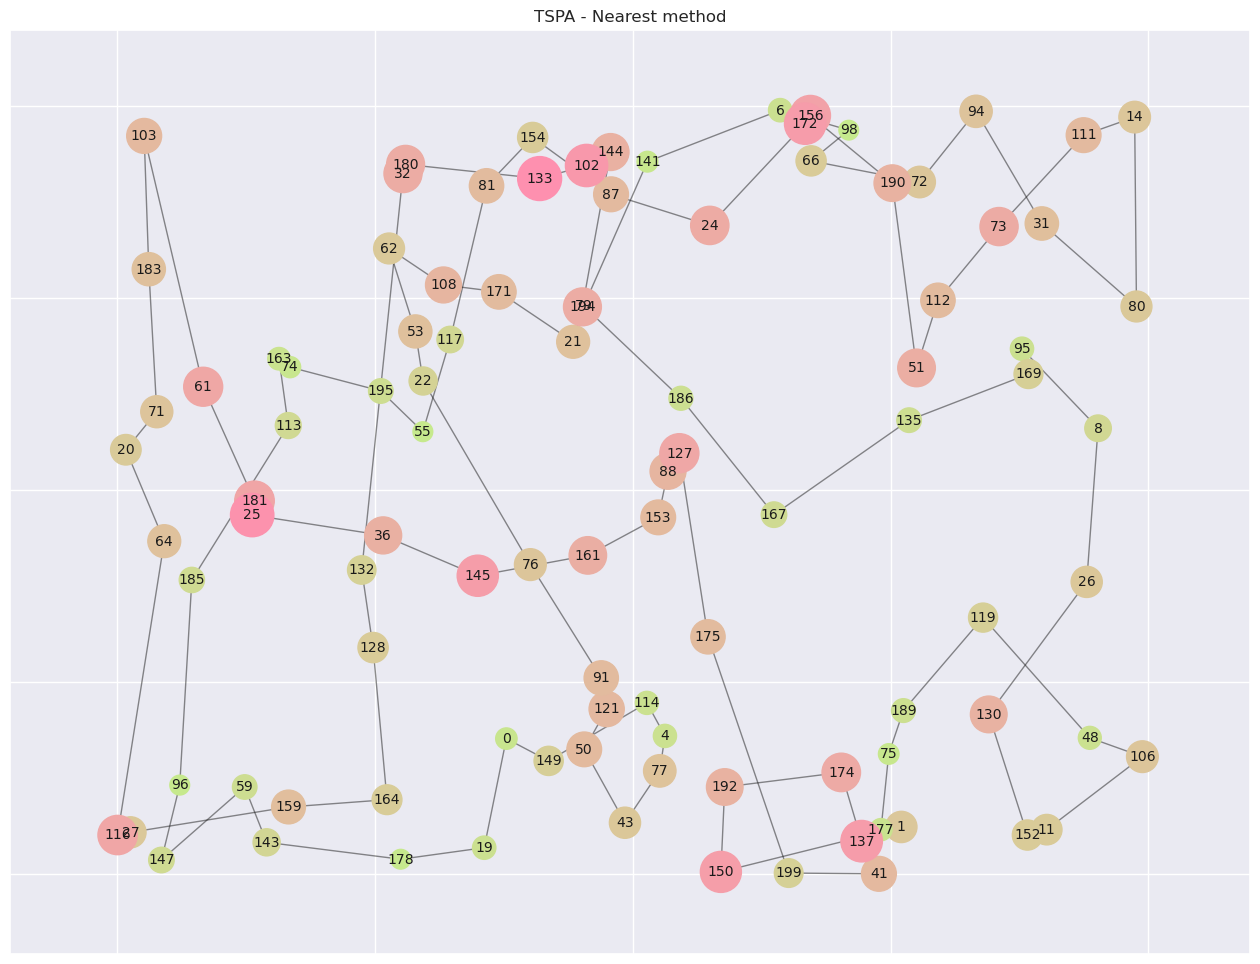

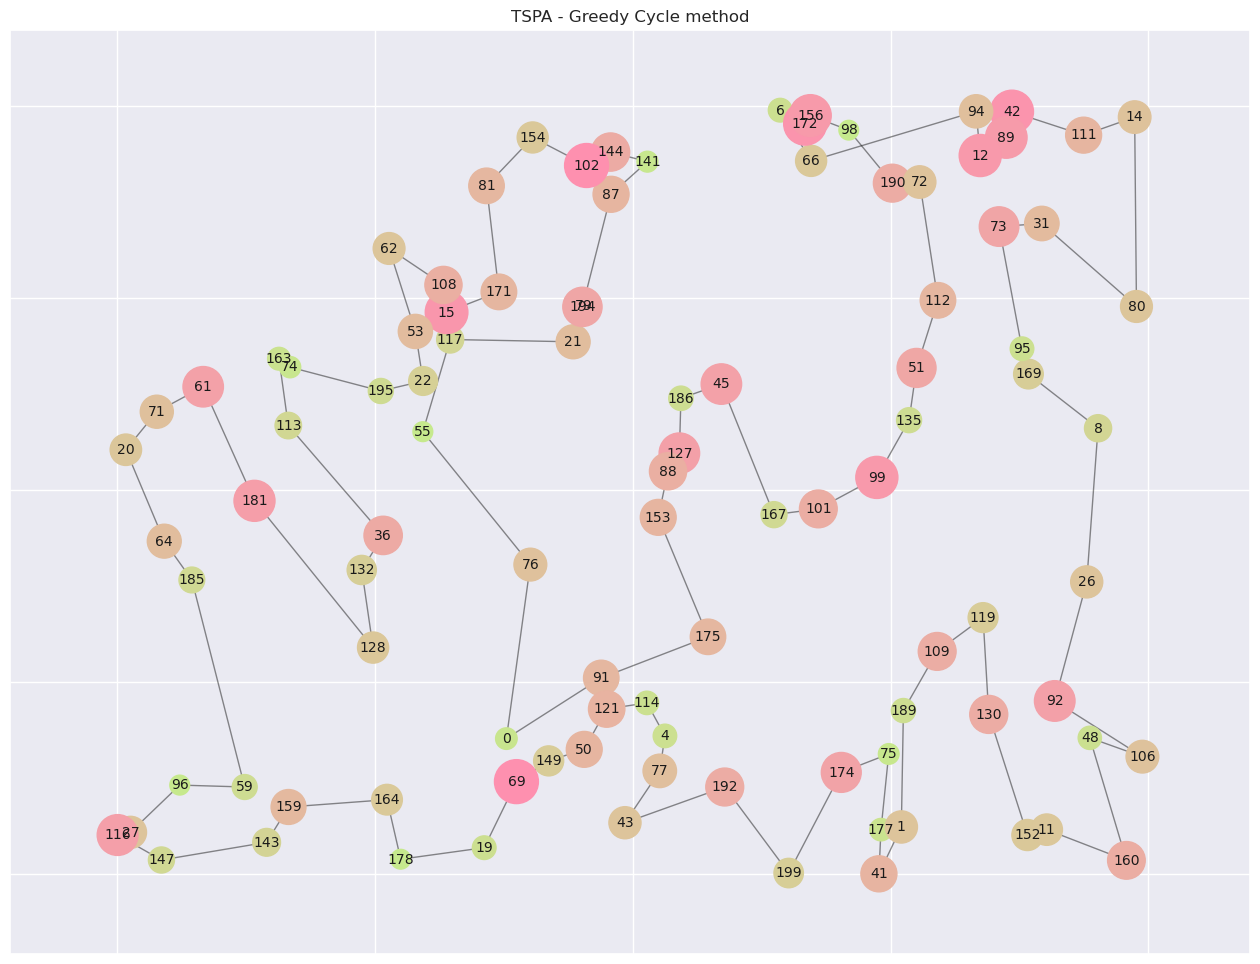

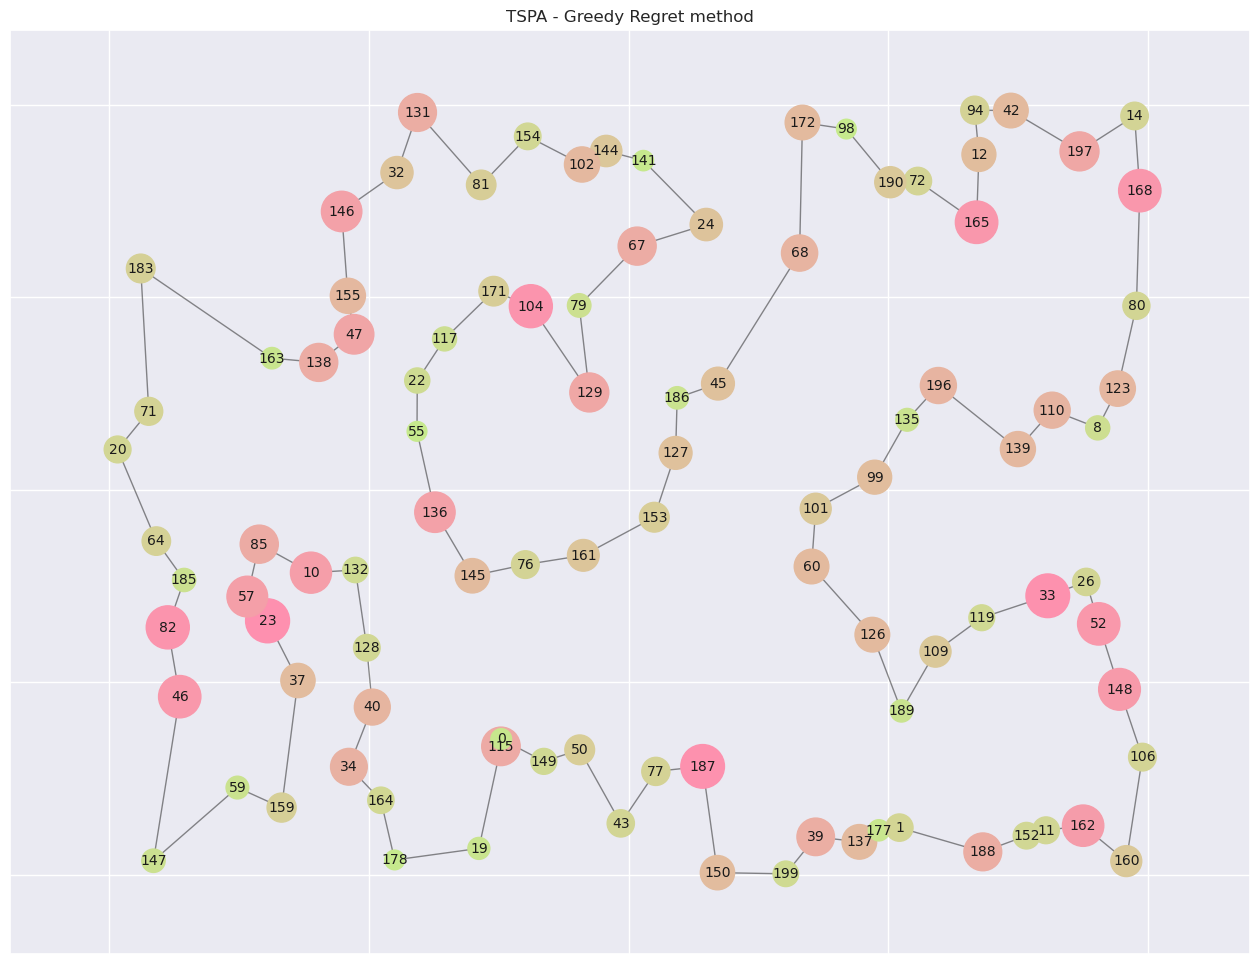

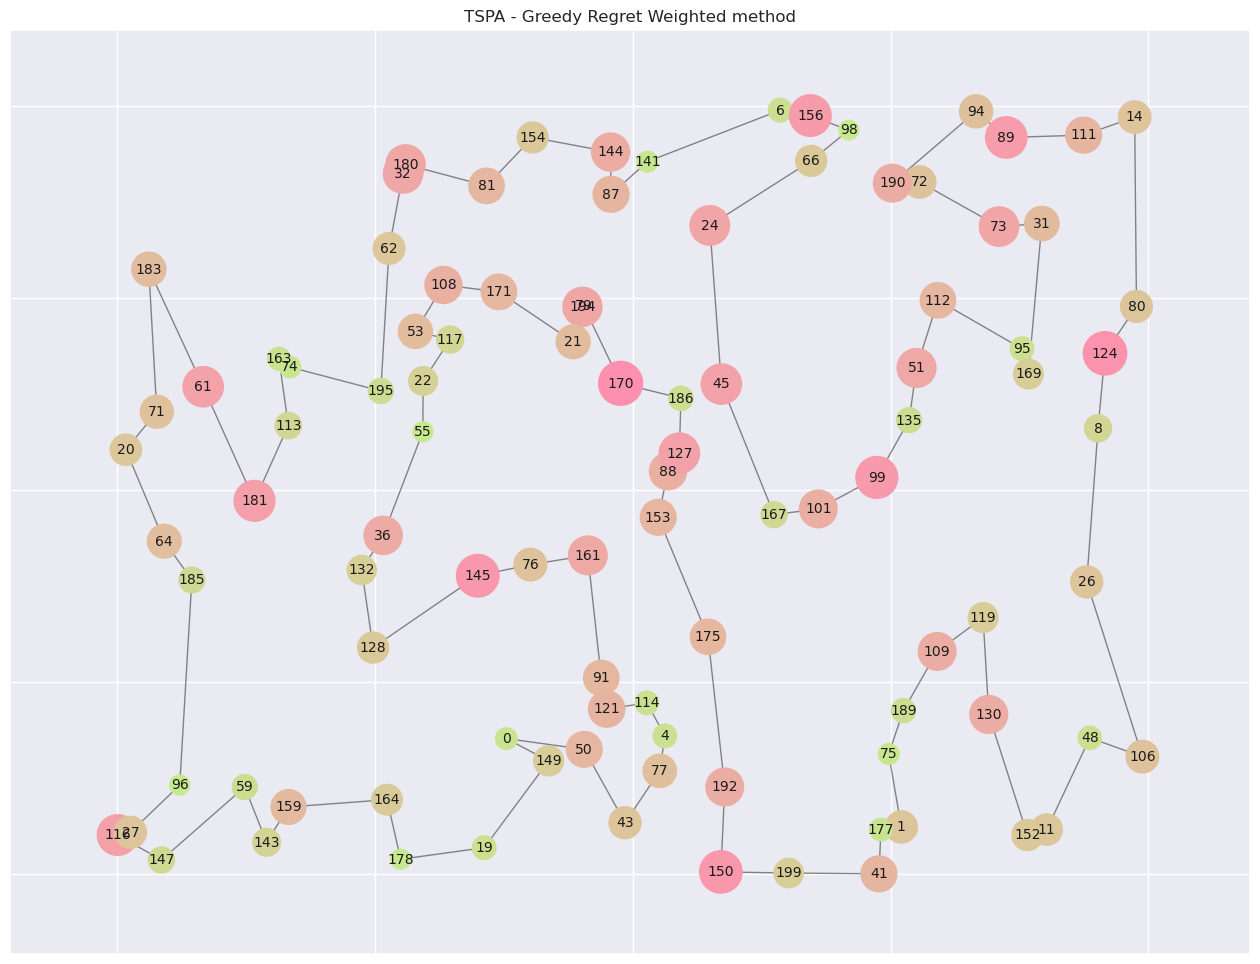

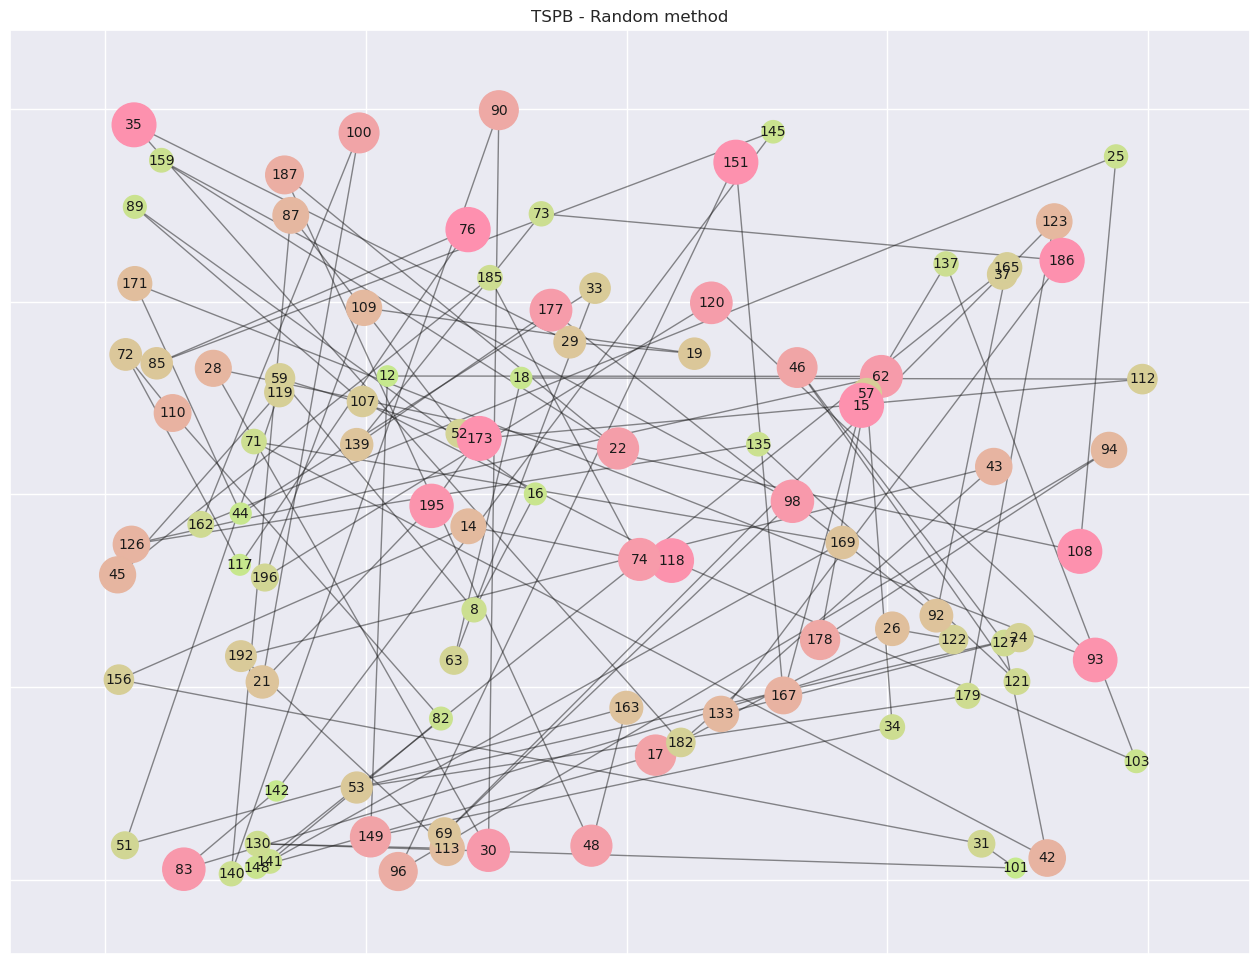

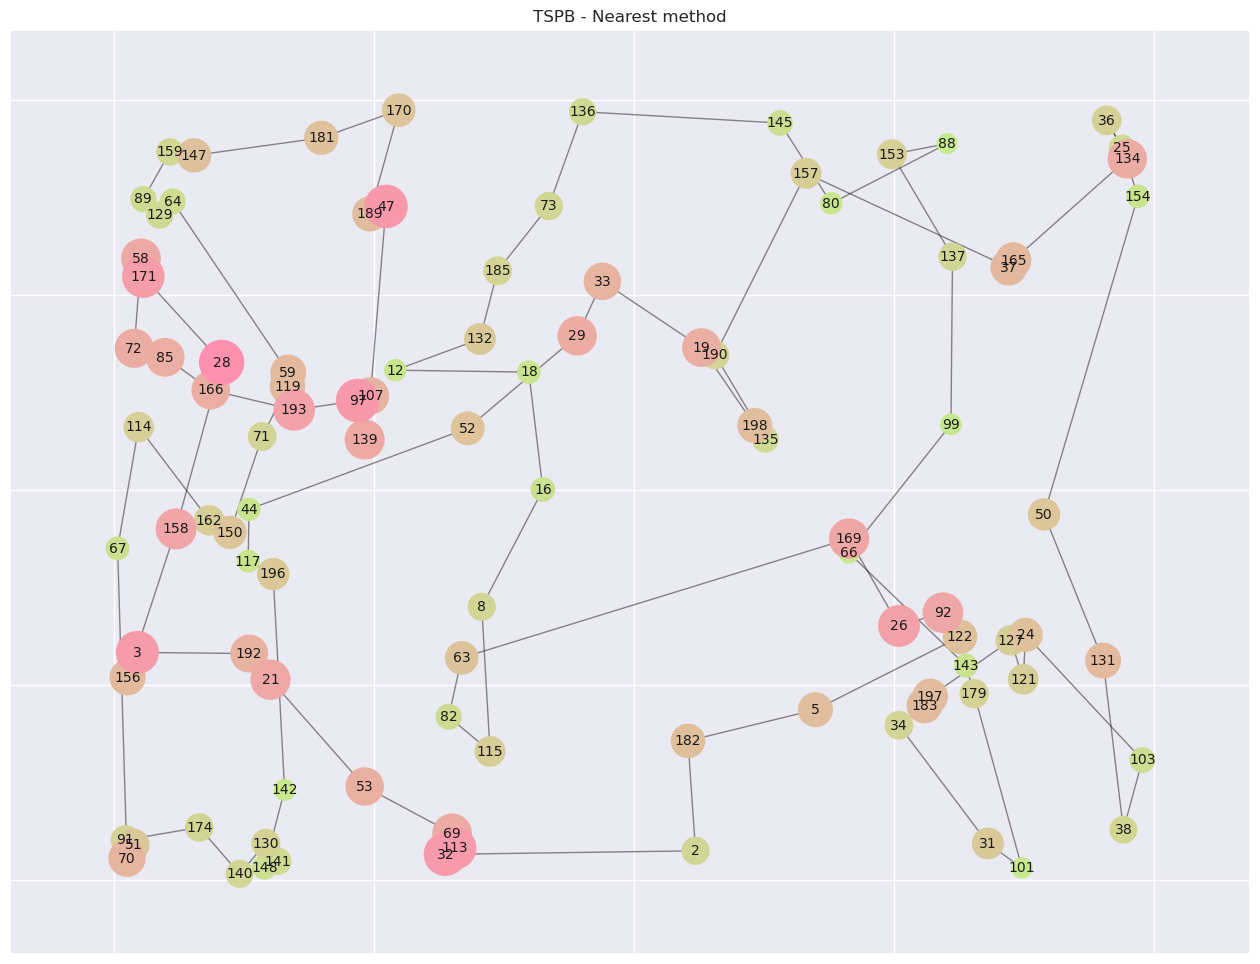

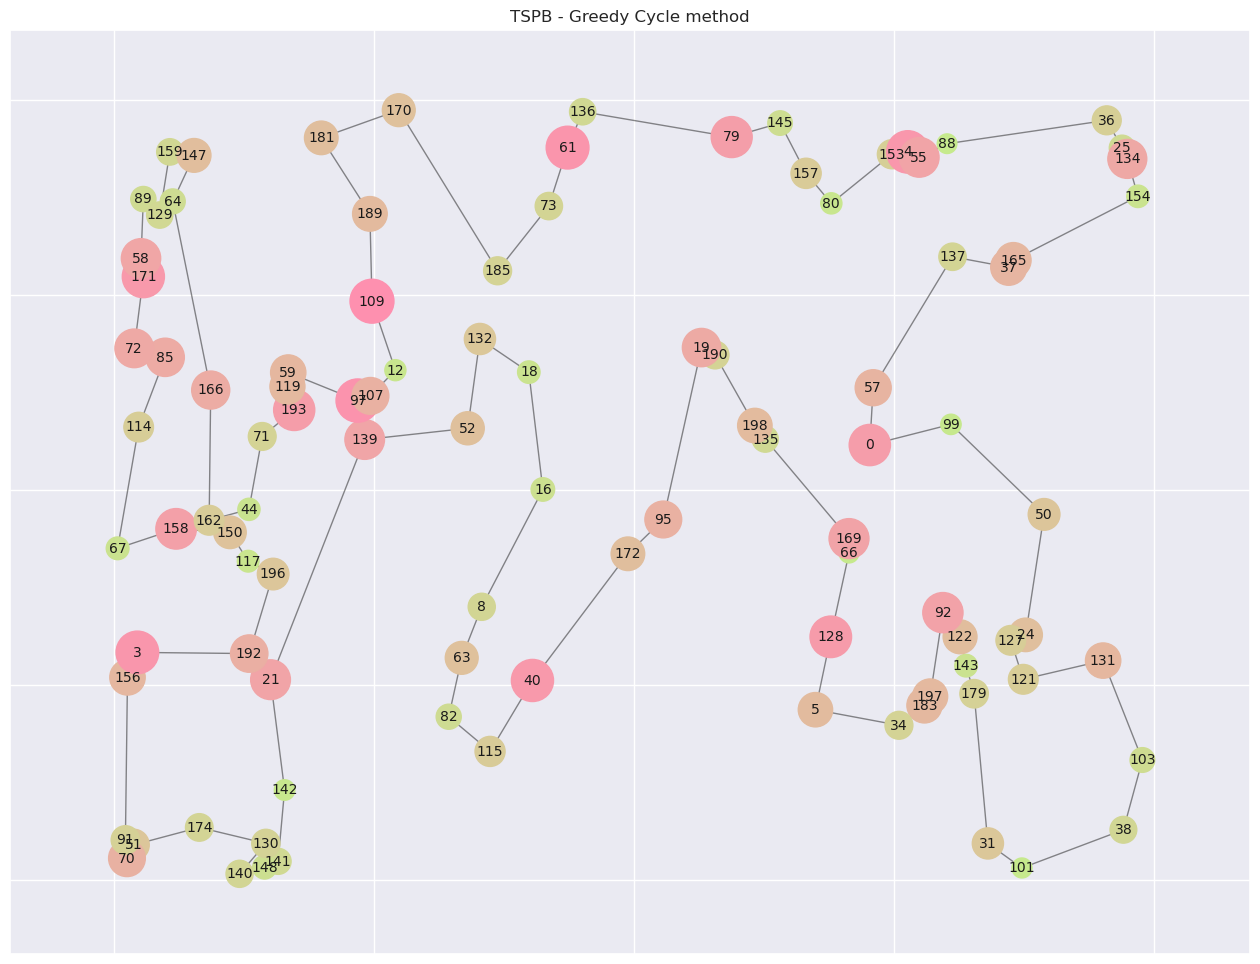

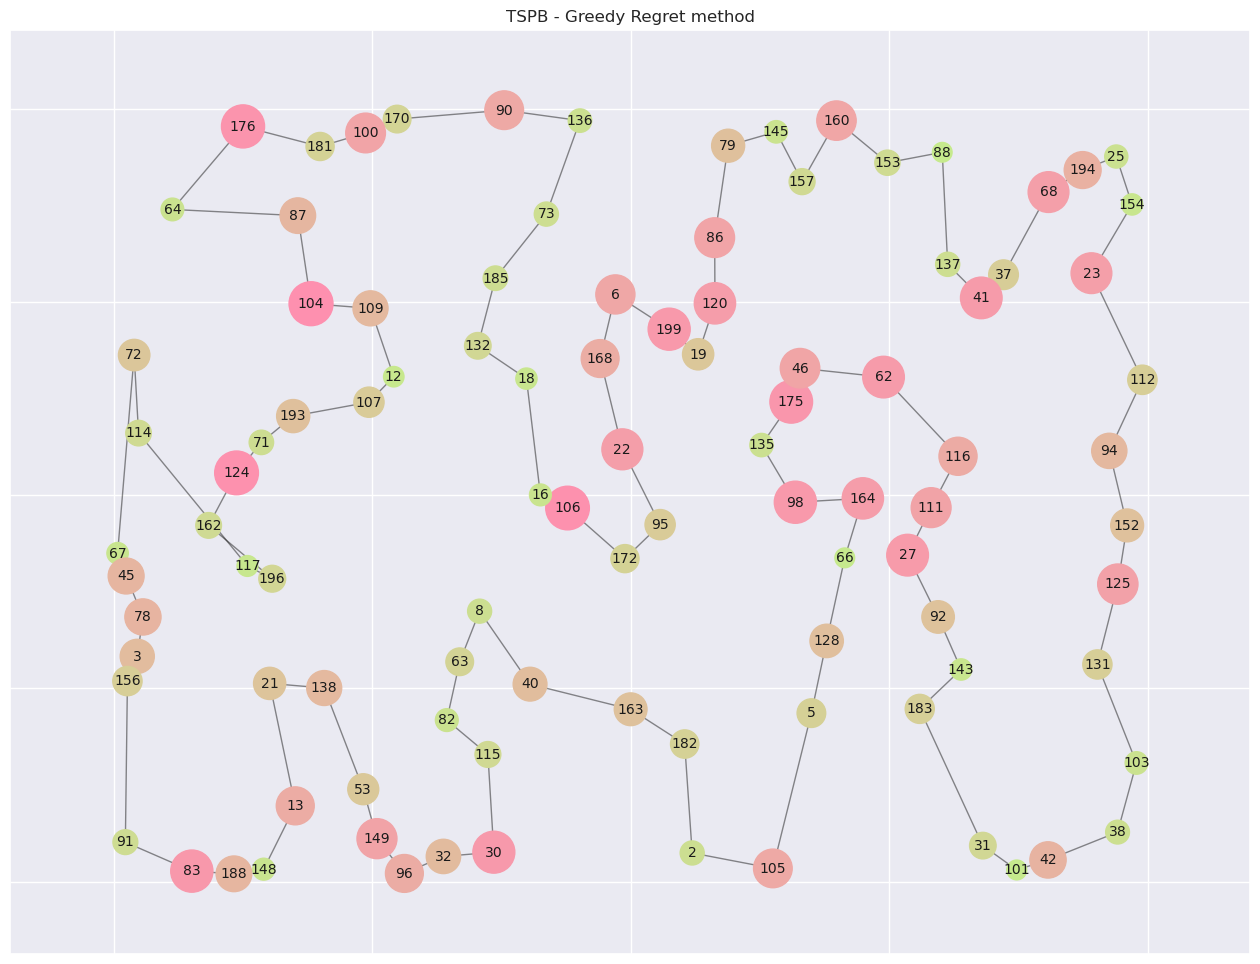

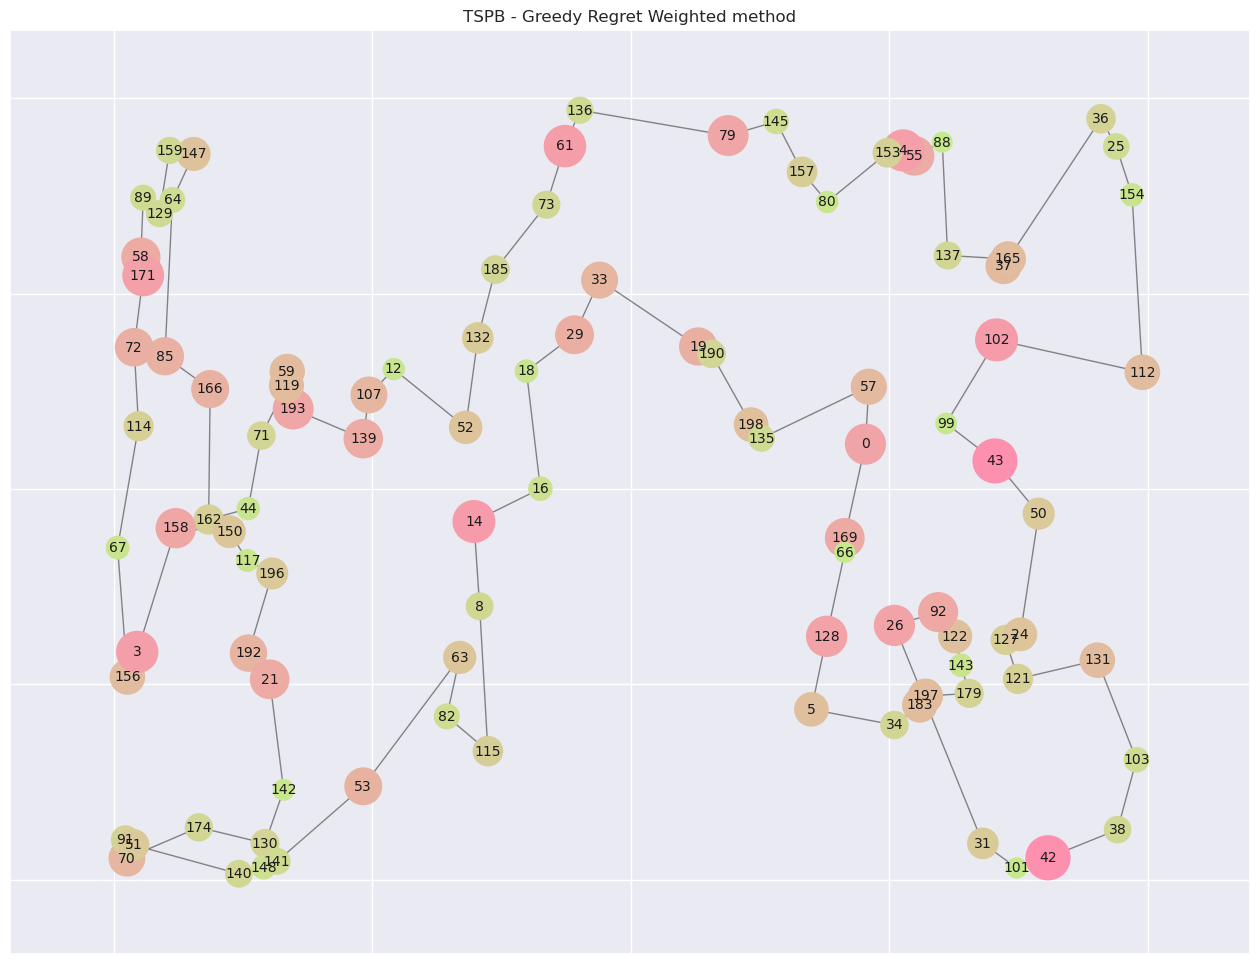

In [11]:
for instance_name, instance_grades in grades.items():
    for method_name, grade in instance_grades.items():
        visualizer.visualise_solution(grade, instance_name, method_name)